# Problem 1

## Solution a

Necessary Libraries

In [1]:
import numpy as np
import networkx as nx
from hmmlearn import hmm

**Initialization**

In [2]:
# Define the states
states = ["Difficult", "Medium", "Easy"]
len_states = len(states)

# Define the observations
observations = ["FB", "B", "S", "NS"]
len_observations = len(observations)

# initial probabilities
init_probabilities = np.array([1/3, 1/3, 1/3])

# Transition matrix:
# Probability by states is as follows:
# If it's difficult, is more likely to transition to medium or easy with a probability of 0.5
# If is either medium or easy, transition to hard is 0.5 and from medium or easy to easy is 0.25

# order: Difficult, Medium, Easy
transition_matrix = np.array([
    [0.0, 0.5, 0.5], # difficult: Is more likely the next test to be either medium or easy
    [0.5, 0.25, 0.25], # from medium: More likely the next test to be difficult
    [0.5, 0.25, 0.25] # from easy: More likely the next test to be difficult
])

# Emission Matrix. Contains all conditional probabilities of observation given states

emission_matrix = np.array([
    [0.1, 0.2, 0.4, 0.3],   # marks with the condition that the test is difficult
    [0.15, 0.25, 0.5, 0.1], # marks with the condition that the test is medium
    [0.2, 0.3, 0.4, 0.1]    # marks with the condition that the test is easy
])



**Creating the Hidden Markov Model**

In [3]:
model = hmm.CategoricalHMM(n_components=len_states, random_state=42)
model.startprob_ = init_probabilities
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

**Displaying the model**

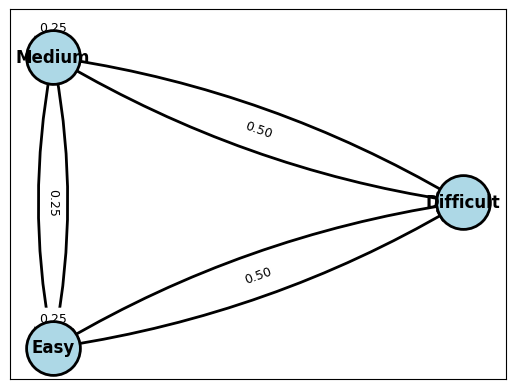

In [4]:
def plot_state_diagram():
    G = nx.DiGraph()

    # Add nodes
    for i, state in enumerate(states):
        G.add_node(state)

    # Add edges with probabilities
    for i, from_state in enumerate(states):
        for j, to_state in enumerate(states):
            prob = transition_matrix[i, j]
            if prob > 0:
                G.add_edge(from_state, to_state, weight=prob, label=f"{prob:.2f}")

    pos = nx.circular_layout(G)

    # Draw state transition diagram
    nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue',
                           edgecolors='black', linewidths=2)
    nx.draw_networkx_edges(G, pos, width=2, arrows=True, arrowsize=20,
                          connectionstyle='arc3,rad=0.1')
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plot_state_diagram()

## solution B

**Declaring the observation sequence**

In [5]:
observation_sequence = ["FB", "FB", "S", "B", "B", "S", "B", "B", "NS", "B", "B"]
observation_indices = [0 if entry == "FB" else 1 if entry == "B" else 2 if entry == "S" else 3 for entry in observation_sequence]

observations = np.array(observation_indices).reshape(-1, 1)

print(observation_sequence)
print(observation_indices)


['FB', 'FB', 'S', 'B', 'B', 'S', 'B', 'B', 'NS', 'B', 'B']
[0, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1]


**Computing the probability**

In [6]:
log_prob = model.score(observations)
probability = np.exp(log_prob)

print(f"Observation sequence: {observation_sequence}")
print(f"Log probability: {log_prob:.6f}")
print(f"Probability: {probability:.10f}")
print(f"Probability (scientific notation): {probability:.2e}")

Observation sequence: ['FB', 'FB', 'S', 'B', 'B', 'S', 'B', 'B', 'NS', 'B', 'B']
Log probability: -15.594069
Probability: 0.0000001689
Probability (scientific notation): 1.69e-07


## Solution c

In [7]:
state_sequence = model.predict(observations)
print(f"Most probable state sequence: {[states[idx] for idx in state_sequence]}")

log_prob_seq = model.score(observations, state_sequence)
probability_seq = np.exp(log_prob_seq)

print(f"Log probability of this sequence: {log_prob_seq:.6f}")
print(f"Probability of this sequence: {probability_seq:.10f}")
print(f"Probability of this sequence (scientific notation): {probability_seq:.2e}")

Most probable state sequence: ['Easy', 'Easy', 'Difficult', 'Easy', 'Difficult', 'Medium', 'Difficult', 'Easy', 'Difficult', 'Easy', 'Difficult']
Log probability of this sequence: -11.346480
Probability of this sequence: 0.0000118110
Probability of this sequence (scientific notation): 1.18e-05
